In [312]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import time
import uszipcode as us
import timeit
plt.style.use('ggplot')
start_time = dt.datetime.now()
%matplotlib inline

In [178]:
%%time
data=pd.read_csv('card transactions.csv')
data.shape

Wall time: 313 ms


(96753, 18)

In [179]:
backup_data = data.copy()

In [180]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
data.describe(include='all')

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,96753.000000,9.675300e+04,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,365,13091,13126,227,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2/28/10,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,684,9310,1688,12035,NaN,96398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48377.000000,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27930.329635,5.567084e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,1.000614e+04,0.104047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24189.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,48377.000000,5.142196e+09,NaN,NaN,NaN,NaN,38118.000000,NaN,1.379800e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,72565.000000,5.142246e+09,NaN,NaN,NaN,NaN,63103.000000,NaN,4.282000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
def count_zeros(data):
    count=0
    for i in data:
        if i==0:
            count+=1
    return count

Data Cleaning

In [183]:
data = data.iloc[:, :10]

In [184]:
fillna = data['Merchnum'].mode()
fillna

0    930090121224
Name: Merchnum, dtype: object

In [185]:
# Replacing merch number with mode of merch number
data['Merchnum'].fillna(fillna, inplace = True)
null_indices = np.where(data['Merchnum'].isnull())[0]
# print(null_indices)
for index in null_indices:
    data.iloc[index, 3] = fillna[0]

[   97   115   135 ... 96689 96720 96730]


In [214]:
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

In [215]:
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

In [186]:
(fillna[0])

'930090121224'

In [187]:
# Replacing merch description with mode of merch description
data['Merch description'].fillna(data['Merch description'].mode(), inplace = True)

In [188]:
search = us.SearchEngine()

In [189]:
zipcode = search.by_zipcode('30174')

In [221]:
data['date'] = pd.to_datetime(data['Date'], format = "%m/%d/%y")

In [190]:
import math

In [191]:
np.where(data['Merch zip'].isnull())[0]

math.isnan(data['Merch zip'][51])
count = 0

In [192]:
null_states = np.where(data['Merch state'].isnull())[0]
null_states

array([   97,   163,   262, ..., 96603, 96651, 96730], dtype=int64)

In [193]:
len(null_states)

1195

In [194]:
# Filling null valued states with zipcode
for index, rows in data.iterrows():
    if(index in null_states):
        if(math.isnan(rows['Merch zip']) == False):
            count += 1
            if(search.by_zipcode(str(int((rows['Merch zip']))))):
                rows['Merch state'] = (search.by_zipcode(str(int((rows['Merch zip']))))).state
                data.loc[index, 'Merch state'] = (search.by_zipcode(str(int((rows['Merch zip']))))).state


In [195]:
data.describe(include = 'all')

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96753.000000,9.675300e+04,96753,96753,96753,95614,92097.000000,96753,9.675300e+04,96753.000000
unique,NaN,NaN,365,13091,13126,229,NaN,4,NaN,NaN
top,NaN,NaN,2/28/10,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN
freq,NaN,NaN,684,12685,1688,12038,NaN,96398,NaN,NaN
mean,48377.000000,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,1.000614e+04,0.104047
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000
50%,48377.000000,5.142196e+09,NaN,NaN,NaN,NaN,38118.000000,NaN,1.379800e+02,0.000000
75%,72565.000000,5.142246e+09,NaN,NaN,NaN,NaN,63103.000000,NaN,4.282000e+02,0.000000


In [196]:
#Imputing unk at Nan states

data['Merch state'].fillna('Unk', inplace = True)

In [198]:
#Imputing mode of zipcodes

zipmode = data['Merch zip'].mode()
data['Merch zip'].fillna(zipmode, inplace = True)
zip_null_indices = np.where(data['Merch zip'].isnull())[0]

for index in zip_null_indices:
    data.iloc[index, 6] = zipmode[0]

In [199]:
cleaned_data = data[data['Merch description'].str.match(r"[Ff][Ee][Dd][Ee][Xx]") == False].copy()
cleaned_data['Amount'] = cleaned_data['Amount'].astype(str)

In [200]:
def n_low(df):
    return ((df['Amount'].str.extract(r"([1-9])") == '1') | (df['Amount'].str.extract(r"([1-9])") == 2)).sum()

In [201]:
cardnums = cleaned_data.groupby('Cardnum').apply(n_low)
cardnums['n'] = cleaned_data.groupby('Cardnum')['Amount'].count()

In [202]:
cleaned_data = data[data[ 'Merch description'].str.match(r" [Ff][Ee] [Dd][Ee][XX]") == False].copy() 
cleaned_data['Amount'] = cleaned_data['Amount'].astype(str)

def n_low(df):
    return ((df['Amount'].str.extract(r"([1-9])") == '1') | (df['Amount'].str.extract(r" ([1-9])")== '2')).sum()


In [203]:

cardnums = cleaned_data.groupby('Cardnum').apply(n_low)

cardnums['n'] = cleaned_data.groupby('Cardnum')['Amount'].count()
cardnums['n_low'] = cleaned_data.groupby( 'Cardnum').apply(n_low)



cardnums =  cardnums[['n','n_low']]

cardnums['n_high'] = cardnums['n'] - cardnums['n_low']


In [204]:

cardnums['n_low'] = cardnums['n_low'].replace(0,1)

cardnums['n_high'] = cardnums['n_high'].replace(0,1)


In [205]:

cardnums['R']= 1.096 * cardnums['n_low']/ cardnums['n_high']

cardnums['1/R'] = 1 / cardnums['R']

cardnums['U'] = cardnums[[ 'R','1/R']].max(axis= 1)


In [206]:

cardnums['t']=(cardnums['n']-15)/3

cardnums['U*']= 1 +((cardnums['U']-1)/(1+ np.exp(-cardnums['t'])))


In [207]:


cardnums.sort_values('U*',ascending=False) [0:40].to_csv('Top40 Cardnum.csv')


In [208]:


merchnums = cleaned_data.groupby('Merchnum').apply(n_low)

merchnums['n']= cleaned_data.groupby('Merchnum' ) ['Amount'].count()

merchnums['n_low'] = cleaned_data.groupby( 'Merchnum').apply(n_low)

merchnums = merchnums[['n', 'n_low']]

merchnums['n_high'] = merchnums['n'] -  merchnums['n_low']


In [209]:


merchnums['n_low'] = merchnums['n_low'].replace(0,1)

merchnums['n_high'] = merchnums['n_high'].replace(0,1)


In [210]:

merchnums['R'] = 1.096 * merchnums['n_low'] / merchnums['n_high']

merchnums['1/R'] = 1/merchnums['R']

merchnums['U'] = merchnums[ [ 'R', '1/R']].max(axis = 1)


In [211]:

merchnums['t'] = (merchnums['n']-15)/3

merchnums['U*'] = 1 + ((merchnums['U']-1)/(1+np.exp(-merchnums['t'])))

merchnums.sort_values('U*', ascending = False) [0:40].to_csv('Top 40 Merchnum.csv')

In [212]:
# statistics_of_data1 = []
# for col in ['date','dob']:
#     statistics_of_data1.append((col,
#                              'datetime',
#                              data[col].notnull().sum(),
#                              f'{data[col].notnull().sum()/data.shape[0]*100}%',
#                              count_zeros(data[col]),
#                              data[col].min(),
#                              data[col].max(),
#                              data[col].mode()[0]
                            
#                              ))

# stats_df1 = pd.DataFrame(statistics_of_data1, columns=['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','Min', 'Max','Most Common',])
# stats_df1

# Data Preparation

In [229]:
#Day of Week Target Encoding
data['dow']=data.Date.apply(lambda x: calendar.day_name[x.weekday()])

AttributeError: 'str' object has no attribute 'weekday'

In [235]:
# data['dow'] = data['date'].weekday()
data['dow'] = data.apply(lambda x: x['date'].weekday(), axis = 1)

In [236]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,date,dow
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,2010-01-01,4
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,2010-01-01,4
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,2010-01-01,4
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,2010-01-01,4
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,2010-01-01,4


In [238]:
# Separate the OOT
train_set=data[data.date<'2010-12-01']

In [239]:
#Statistical Smoothing
c=4;nmid=20;y_avg=train_set['Fraud'].mean()
y_dow=train_set.groupby('dow')['Fraud'].mean()
num=train_set.groupby('dow').size()
y_dow_smooth=y_avg+(y_dow-y_avg)/(1+np.exp(-(num-nmid)/c))
data['dow_risk']=data.dow.map(y_dow_smooth)

In [240]:
# delete files that we don't need any more to free up memory
del train_set

In [241]:
y_dow=y_dow.reset_index()
cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y_dow['dow']=pd.Categorical(y_dow['dow'],categories=cats,ordered=True)
y_dow=y_dow.sort_values('dow')
y_dow=y_dow.set_index('dow')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

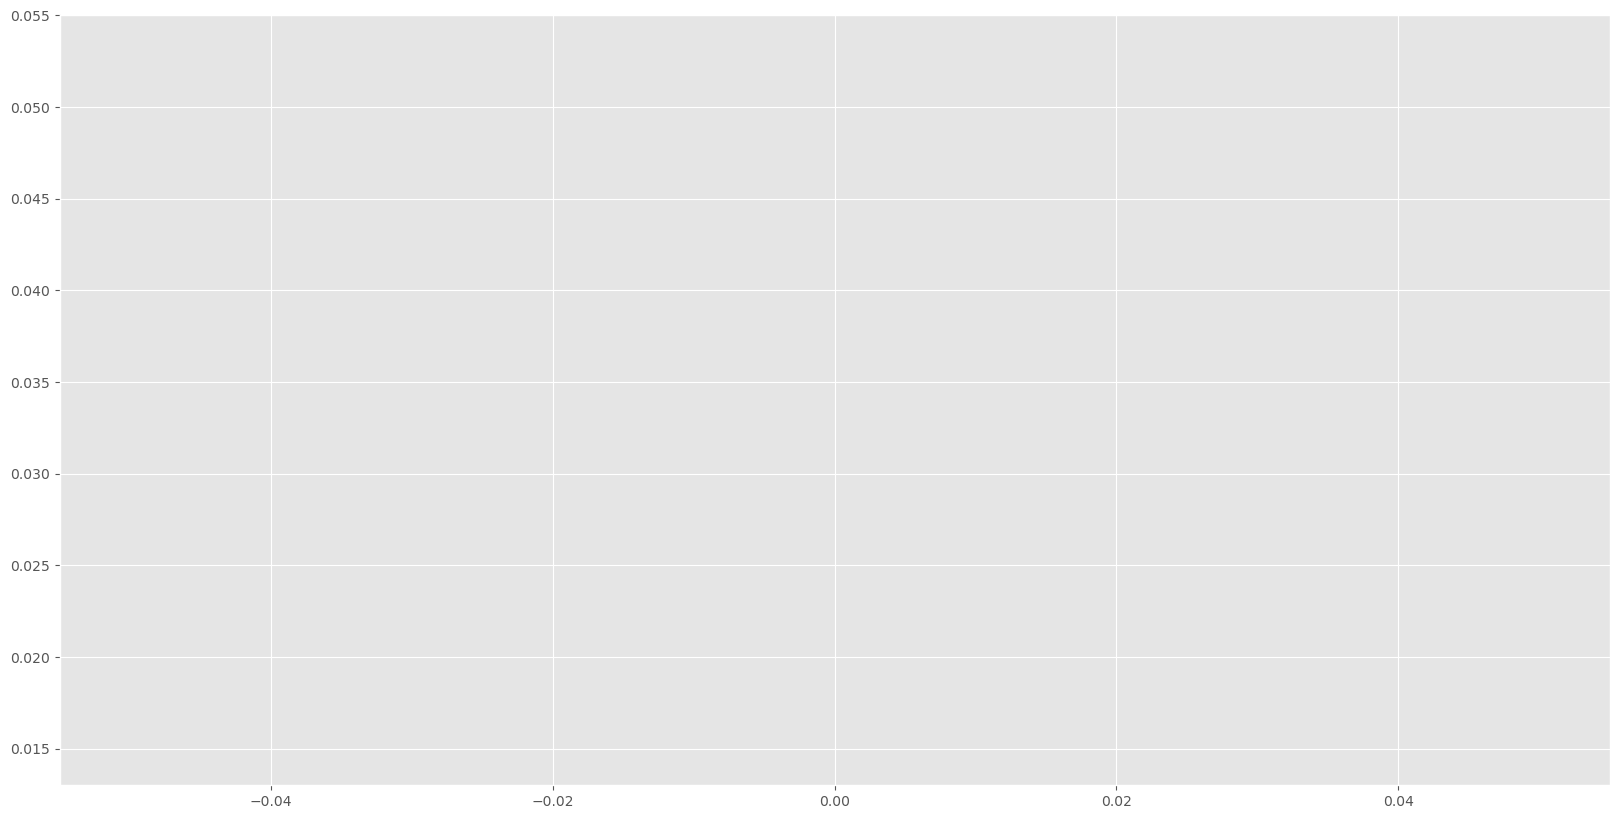

In [243]:
#plot
fig,ax=plt.subplots(figsize=(20,10))
plt.bar(data=y_dow,x=y_dow.index,height='Fraud',color='darkblue')
ax.set_ylim(bottom=.013)
ax.axhline(y=y_avg,ls='--',lw=2)

for i in (y_dow.index):
    ax.text(i,y_dow.loc[i,'Fraud']+0.0001,round(y_dow.loc[i,'Fraud'],5),horizontalalignment='center',fontsize=15)


plt.savefig('risktable.png')
plt.show()

In [244]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,date,dow,dow_risk
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,2010-01-01,4,0.024241
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,2010-01-01,4,0.024241
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,2010-01-01,4,0.024241
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,2010-01-01,4,0.024241
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,2010-01-01,4,0.024241


In [249]:
# Make new entities for variables
# data['name']=data.firstname+data.lastname
data['fulladdress']=str(data['Merch state']) + str(data['Merch zip'])
# data['name_dob']=data.name+data.dob
data['merchnum_fulladdress']=str(data.Merchnum) + data.fulladdress
data['cardnum_fulladdress']=str(data.Cardnum) + data.fulladdress
# data['name_homephone']=data.name+data.homephone
# data['fulladdress_dob']=data.address+data.dob
# data['fulladdress_homephone']=data.address+data.homephone
# data['dob_homephone']=data.dob+data.homephone
# data['homephone_name_dob']=data.homephone+data.name_dob

In [250]:
data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud', 'date',
       'dow', 'dow_risk', 'fulladdress', 'merchnum_fulladdress',
       'cardnum_fulladdress'],
      dtype='object')

In [253]:
for i in list(data.iloc[:,np.r_[2:8]]):
    data['cardnum_'+i]=str(data.Cardnum) + str(data[i])

In [254]:
data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud', 'date',
       'dow', 'dow_risk', 'fulladdress', 'merchnum_fulladdress',
       'cardnum_fulladdress', 'cardnum_Date', 'cardnum_Merchnum',
       'cardnum_Merch description', 'cardnum_Merch state', 'cardnum_Merch zip',
       'cardnum_Transtype'],
      dtype='object')

In [255]:
len(data.columns)

22

In [256]:
attributes=list(data.iloc[:,np.r_[2, 4, 5, 6, 7, 8, 13:22]].columns)

In [257]:
attributes

['Date',
 'Merch description',
 'Merch state',
 'Merch zip',
 'Transtype',
 'Amount',
 'fulladdress',
 'merchnum_fulladdress',
 'cardnum_fulladdress',
 'cardnum_Date',
 'cardnum_Merchnum',
 'cardnum_Merch description',
 'cardnum_Merch state',
 'cardnum_Merch zip',
 'cardnum_Transtype']

In [258]:
len(attributes)

15

# Creating Variables

In [260]:
df=data.copy()
vars=data.copy()
df['check_date']=df.date
df['check_record']=df.Recnum
numvars = 1
vars.shape

(96753, 22)

In [264]:
# del backup_data
del data

In [269]:
#find the day of the week


## we want to not use the oot for target encoding variables

train_test=df[df.date < '2010-11-1']


In [294]:


c = 4; nmid = 20; y_avg = train_test['Fraud'].mean()

y_dow =  train_test.groupby("dow")['Fraud'].mean()

num = train_test.groupby('dow').size()

y_dow_smooth = y_avg + (y_dow-y_avg)/(1+ np.exp(-(num - nmid)/c))

df['Dow_Risk'] = df.dow.map(y_dow_smooth)


In [295]:
y_dow

dow
0    0.008680
1    0.007095
2    0.009743
3    0.018614
4    0.025986
5    0.010040
6    0.009588
Name: Fraud, dtype: float64

In [ ]:

y_dow = y_dow.reset_index()

In [305]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y_dow['dow'] = y_dow.apply(lambda x: cats[int(x['dow'])], axis = 1)
y_dow = y_dow.sort_values('dow') 
y_dow = y_dow.set_index("dow")


In [ ]:

# cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# y_dow['dow'] = pd.Categorical(y_dow['dow'], categories = cats, ordered = True)

# # y_dow = y_dow.sort_values('dow') 
# # y_dow = y_dow.set_index("dow")


In [306]:
y_dow

,Fraud
dow,
Friday,0.025986
Monday,0.008680
Saturday,0.010040
Sunday,0.009588
Thursday,0.018614
Tuesday,0.007095
Wednesday,0.009743


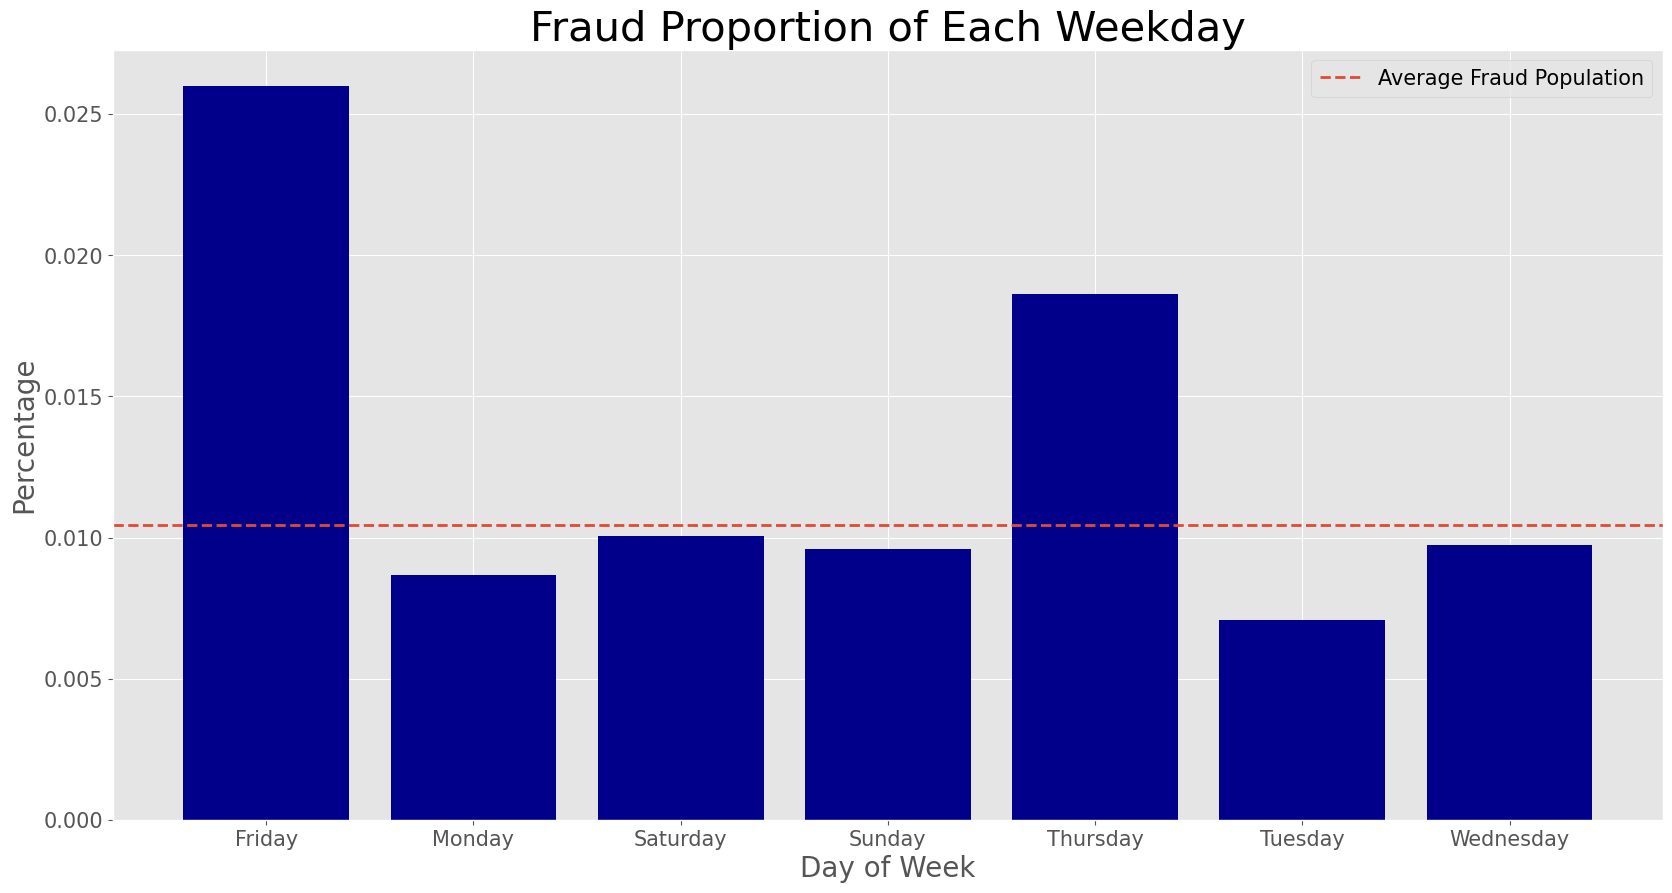

In [307]:

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize =(20,10))

plt.bar(data = y_dow, x = y_dow.index, height = 'Fraud', color = 'darkblue' )

# ax.set ylim(bottom= 0.013)

ax.axhline(y = y_avg, ls = '--', lw = 2, label="Average Fraud Population")

for i, v in enumerate(y_dow.index): 
    ax.text(v, y_dow.loc[v, 'Fraud']+ 0.0001, round(y_dow.loc[v, 'Fraud'],5), horizontalalignment = "center", fontsize=15)

plt.legend(['Average Fraud Population'], fontsize=15)

plt.xlabel("Day of Week", fontsize=20)

plt.ylabel("Percentage", fontsize=20) 
plt.xticks(fontsize=15)

plt.yticks(fontsize=15) 
plt.title("Fraud Proportion of Each Weekday", fontsize=30)
plt.show()

In [313]:
# ! pip install timeit
start = timeit.default_timer()


In [314]:
df1 = df.copy()
final = df.copy()
df1['check_date'] = df1.Date
df1['check_record'] = df1.Recnum
entities = attributes

In [ ]:
f3 = pd.DataFrame()
for entity in entities:
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))
    except: print('')
    st = timeit.default_timer()
    final = final.sort_values(by = [entity, 'date'])
    final = final.reset_index()
    final = final.drop('index', axis = 1)
    count = 0
    final[entity + "_day_since"] = np.nan
    for index, rows in final.iterrows():
        if(index == 0):
            continue
        if(final.loc[index, entity] == final.loc[index - 1, entity]):
            final.loc[index, entity + "_day_since"] = (final.loc[index, 'date'] - final.loc[index - 1, 'date']).dt.days
    final['cum' + entity + "_day_since"] = final.groupby(entity, 'date').sum().groupby(level = 0).cumsum().reset_index()[entity + "_day_since"]
    for time in [0, 1, 3, 7, 14, 30]:
        unique_entity = final[entity].unique()
        
        for u in unique_entity:
            f1 = final[final[entity] == u]
            for i, r in f1.iterrows():
                f2 = f1.iloc[i:, :]
                var = r['cum' + entity + "_day_since"] + time
                f1.loc[i, entity + '_day_since'] = len(f2[f2['cum' + entity + "_day_since"] < var]) - 1
                f1[entity + '_day_since'].fillna((f1.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)
                f3 = pd.concat([f3, f1])
                # f3 = f3.append(f1)
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')
        
        

    

In [315]:
for entity in entities:    
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))
    except: print('')
    st = timeit.default_timer()    
    ## Day-since variables:   
    df_l = df1[['Recnum', 'Date', entity]]
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]    
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)   
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']]\
                                                   .groupby('Recnum')[['Date', 'check_date']].last()
    mapper = (temp1.Date - temp1.check_date).dt.days
    final[entity + '_day_since'] = final.Recnum.map(mapper)
    final[entity + '_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)
    print('\n' + entity + '_day_since ---> Done')   
    ## Frequency & Amount variables:   
    for time in [0,1,3,7,14,30]:       
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) &\
                       (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]       
        col_name = entity + '_count_' + str(time)    
        mapper2 = temp2.groupby('Recnum')[entity].count()      
        final[col_name] = final.Recnum.map(mapper2)        
        print(col_name + ' ---> Done')       
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
        final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
        final[entity + '_actual/max_' + str(time)] = final['Amount'] / final[entity + '_max_' + str(time)]
        final[entity + '_actual/med_' + str(time)] = final['Amount'] / final[entity + '_med_' + str(time)]
        final[entity + '_actual/toal_' + str(time)] = final['Amount'] / final[entity + '_total_' + str(time)]       
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')


Run time for the last entity ----------------- -1677787663.0127137s


ValueError: The column label 'Date' is not unique.

## Velocity/counts and days since

In [ ]:
begin=time.time()
for i in attributes:
    st=time.time()
    df_1=df[['Recnum','date',i]]
    df_r=df[['check_record','check_date',i]]
    temp=pd.merge(df_1,df_r,left_on=i,right_on=i)
    
    #day since
    day_since_df=temp[temp.record>temp.check_record][['Recnum','date','check_date']]\
    .groupby('Recnum')[['date','check_date']].last()
    mapper=(day_since_df.date-day_since_df.check_date).dt.days
    vars[i+'_day_since']=vars.record.map(mapper)
    vars[i+'_day_since'].fillna(365,inplace=True)
    print(f'\n{i}_day_since --->Done')
    
    #Velocity
    for v in [0,1,3,7,14,30]:
        count_day_df=temp[((temp.check_date)>=(temp.date-dt.timedelta(v)))
                          &(temp.record>=temp.check_record)]
        col_name=f'{i}_count_{v}'
        mapper2=count_day_df.groupby('Recnum')[i].count()
#         vars[col_name]=vars.record.map(mapper2)
        vars[col_name] = pd.concat([vars[col_name], vars.record.apply(lambda s : s.map(mapper2))])
        print(f'{i}_count_{str(v)} --->Done')
    print(f'Run time for entity {i}--------{time.time()-st:0.2f}s')
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

MemoryError: Unable to allocate 261. MiB for an array with shape (34257553,) and data type int64

In [ ]:
cat /proc/sys/vm/overcommit_memorycat /proc/sys/vm/overcommit_memory

NameError: name 'cat' is not defined

In [ ]:
numvars_new = len(vars.columns)- 31 - numvars
numvars = len(vars.columns) - 31
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 161   total variables: 162


In [ ]:
# relative velocity
start=time.time()
for i in attributes:
    for d in ['0','1']:
        for dd in ['3','7','14','30']:
            vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
print(f'Total run time:{time.time()-start:0.2f}s')

C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

Total run time:5.31s


C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
C:\Users\trivi\AppData\Local\Temp\ipykernel_28424\4002286599.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

In [ ]:
numvars_new = len(vars.columns) - 31 - numvars
numvars = len(vars.columns) - 31
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 184   total variables: 346


## Counts by entities 

In [ ]:
# begin=time.time()
# col_comb_set = set()
# for i in attributes:
#     for v in attributes:
       
#         st=time.time()
#         if i==v or col_comb_set.__contains__(i+"__"+v) or col_comb_set.__contains__(v+"__"+i):
#             continue
#         else:
#             df_c=df[['record','date',i]]
#             df_d=df[['check_record','check_date',i,v]]
#             temp=pd.merge(df_c,df_d,left_on=i,right_on=i)
       
#         #number of unique for particular field
#         for t in [0,1,3,7,14,30,60]:
#             count_day_df=temp[((temp.check_date) >= (temp.date-dt.timedelta(t))) & (temp.record >= temp.check_record)]
#             col_name = f'{i}_unique_count_for_{v}_{t}'
#             mapper = count_day_df.groupby(['record'])[v].nunique()
#             # temp_df = pd.DataFrame(vars.record.map(mapper))
#             # temp_df.columns = [col_name]
#             # vars = pd.concat([vars,temp_df],axis=1)
#             vars[col_name]=vars.record.map(mapper)
       
#         print(f'Run time for entity {i} in field {v}--------{time.time()-st:0.2f}s')
#         col_comb_set.add(i+"__"+v)   
#         col_comb_set.add(v+"__"+i)
#         print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

In [ ]:
%%time
begin=time.time()
for i in attributes:
    for v in attributes:
        st=time.time()
        if i==v:
            continue
        else:
            df_c=df[['record','date',i]]
            df_d=df[['check_record','check_date',i,v]]
            temp=pd.merge(df_c,df_d,left_on=i,right_on=i)
        
        #number of unique for particular field
        for t in[0,1,3,7,14,30,60]:
            count_day_df=temp[((temp.check_date)>=(temp.date-dt.timedelta(t)))
                          &(temp.record>=temp.check_record)]
            col_name=f'{i}_unique_count_for_{v}_{t}'
            mapper=count_day_df.groupby(['record'])[v].nunique()
            vars[col_name]=vars.record.map(mapper)
        
        print(f'Run time for entity {i} in field {v}--------{time.time()-st:0.2f}s')
        
    print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field address--------10.08s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field zip5--------10.69s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field dob--------11.97s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field homephone--------11.04s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field name--------11.16s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field fulladdress--------10.00s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field name_dob--------9.03s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field name_fulladdress--------9.00s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field name_homephone--------9.53s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field fulladdress_dob--------9.47s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field fulladdress_homephone--------10.18s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field dob_homephone--------9.43s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field homephone_name_dob--------9.45s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_firstname--------10.95s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_lastname--------9.41s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_address--------8.95s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_zip5--------8.68s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_dob--------8.94s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_homephone--------9.32s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_name--------9.36s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_fulladdress--------9.60s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_name_dob--------8.87s
Total run time:3.59min


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn--------9.47s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field zip5--------10.82s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field dob--------10.94s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field homephone--------11.23s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field name--------10.09s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field fulladdress--------8.73s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field name_dob--------11.40s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field name_fulladdress--------11.75s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field name_homephone--------9.05s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field fulladdress_dob--------8.69s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field fulladdress_homephone--------8.89s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field dob_homephone--------9.26s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field homephone_name_dob--------9.55s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_firstname--------9.21s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_lastname--------9.24s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_address--------8.74s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_zip5--------8.85s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_dob--------9.40s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_homephone--------9.55s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_name--------10.25s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_fulladdress--------9.28s


<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_name_dob--------10.14s
Total run time:7.16min


MemoryError: Unable to allocate 1.78 GiB for an array with shape (2, 119505952) and data type int64

In [ ]:
del df

In [ ]:
numvars_new = len(vars.columns) - 31 - numvars
numvars = len(vars.columns) - 31
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 3542   total variables: 3888


In [ ]:
print('time to here: ',dt.datetime.now() - start_time)

time to here:  1:34:09.667811


In [ ]:
# # This works to remove duplicate columns from a very large dataframe, but it takes a long time
# # for a df shape 1,000,000 by 4,000 it takes 10 hours on my macbook

# def duplicate_columns(frame):
#     groups = frame.columns.to_series().groupby(frame.dtypes).groups
#     dups = []

#     for t, v in groups.items():

#         cs = frame[v].columns
#         vs = frame[v]
#         lcs = len(cs)

#         for i in range(lcs):
#             ia = vs.iloc[:,i].values
#             for j in range(i+1, lcs):
#                 ja = vs.iloc[:,j].values
#                 if np.array_equiv(ia, ja):
#                     dups.append(cs[i])
#                     break

#     return dups

In [ ]:
# %%time
# # I need this extra column dedup cell for my smaller memory macbook, but it takes about 10 hours to run
# dups = duplicate_columns(vars)
# vars = vars.drop(dups, axis=1)
# numvars = len(vars.columns) - 31
# vars.shape

In [ ]:
# %%time
# print(vars.shape)
# vars_new = vars.T.drop_duplicates(inplace=True).T
# del(vars)
# vars = vars_new.copy()
# del(vars_new)
# vars.shape

## Maximum Indicator

In [ ]:
# Maximum Indicator
begin=time.time()
for i in attributes:
    print(i)
    for v in ['1','3','7','30']:
        st=time.time()
        mapper=vars.groupby(i)[i+'_count_'+v].max()
        vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)
        print(f'max_count_by_{i}_{v} --->Done')
    print(f'Run time for entity {i}--------{time.time()-st}s')
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

ssn


/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_6248/1802515304.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)


max_count_by_ssn_1 --->Done
max_count_by_ssn_3 --->Done
max_count_by_ssn_7 --->Done
max_count_by_ssn_30 --->Done
Run time for entity ssn--------2.4205241203308105s
address
max_count_by_address_1 --->Done
max_count_by_address_3 --->Done
max_count_by_address_7 --->Done
max_count_by_address_30 --->Done
Run time for entity address--------2.7260522842407227s
zip5
max_count_by_zip5_1 --->Done
max_count_by_zip5_3 --->Done
max_count_by_zip5_7 --->Done
max_count_by_zip5_30 --->Done
Run time for entity zip5--------0.25795412063598633s
dob
max_count_by_dob_1 --->Done
max_count_by_dob_3 --->Done
max_count_by_dob_7 --->Done
max_count_by_dob_30 --->Done
Run time for entity dob--------0.7419121265411377s
homephone
max_count_by_homephone_1 --->Done
max_count_by_homephone_3 --->Done
max_count_by_homephone_7 --->Done
max_count_by_homephone_30 --->Done
Run time for entity homephone--------0.5190417766571045s
name
max_count_by_name_1 --->Done
max_count_by_name_3 --->Done
max_count_by_name_7 --->Done
max_c

In [ ]:
numvars_new = len(vars.columns) - 31 - numvars
numvars = len(vars.columns) - 31
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 92   total variables: 3980


## Age Indicator

In [ ]:
# Age Indicator
data['age_when_apply']=data['date'].dt.year-data['dob_dt'].dt.year
begin=time.time()
for i in attributes:
    st=time.time()
    mapper_max=vars.groupby(i)['age_when_apply'].max()
    mapper_mean=vars.groupby(i)['age_when_apply'].mean()
    mapper_min=vars.groupby(i)['age_when_apply'].min()
    vars['max_age_by_'+i]=vars[i].map(mapper_max)
    vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
    vars['min_age_by_'+i]=vars[i].map(mapper_min)
    print(f'age_by_{i} --->Done')
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_6248/865726071.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_6248/865726071.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/tv/j28cf6c114v0ms8psrzsx1200000gp/T/ipykernel_6248/865726071.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

age_by_ssn --->Done
age_by_address --->Done
age_by_zip5 --->Done
age_by_dob --->Done
age_by_homephone --->Done
age_by_name --->Done
age_by_fulladdress --->Done
age_by_name_dob --->Done
age_by_name_fulladdress --->Done
age_by_name_homephone --->Done
age_by_fulladdress_dob --->Done
age_by_fulladdress_homephone --->Done
age_by_dob_homephone --->Done
age_by_homephone_name_dob --->Done
age_by_ssn_firstname --->Done
age_by_ssn_lastname --->Done
age_by_ssn_address --->Done
age_by_ssn_zip5 --->Done
age_by_ssn_dob --->Done
age_by_ssn_homephone --->Done
age_by_ssn_name --->Done
age_by_ssn_fulladdress --->Done
age_by_ssn_name_dob --->Done
Total run time:2.08min


In [ ]:
del data

In [ ]:
vars.shape

(1000000, 4080)

In [ ]:
numvars_new = len(vars.columns) - 31 - numvars
numvars = len(vars.columns) - 31
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 69   total variables: 4049


In [ ]:
vars.columns.to_list()
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

Total run time:2.09min


In [ ]:
vars.shape

(1000000, 4080)

In [ ]:
print('duration: ',dt.datetime.now() - start_time)

duration:  1:39:14.772276


In [ ]:
vars.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,...,min_age_by_ssn_homephone,max_age_by_ssn_name,mean_age_by_ssn_name,min_age_by_ssn_name,max_age_by_ssn_fulladdress,mean_age_by_ssn_fulladdress,min_age_by_ssn_fulladdress,max_age_by_ssn_name_dob,mean_age_by_ssn_name_dob,min_age_by_ssn_name_dob
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,000000-1,1797504115,0,...,110,110,110.0,110,110,110.0,110,110,110.0,110
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,...,83,83,83.0,83,83,83.0,83,83,83.0,83
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,000000-3,0216537580,0,...,110,110,110.0,110,110,110.0,110,110,110.0,110
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,0132144161,0,...,73,73,73.0,73,73,73.0,73,73,73.0,73
4,5,2017-01-01,024065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0,...,19,19,19.0,19,19,19.0,19,19,19.0,19


In [ ]:
%%time
vars.drop(columns=attributes,inplace=True)
vars.head()

CPU times: user 49.8 s, sys: 2min 19s, total: 3min 9s
Wall time: 4min 29s


,record,date,firstname,lastname,fraud_label,dob_dt,age_when_apply,dow,dow_risk,ssn_day_since,...,min_age_by_ssn_homephone,max_age_by_ssn_name,mean_age_by_ssn_name,min_age_by_ssn_name,max_age_by_ssn_fulladdress,mean_age_by_ssn_fulladdress,min_age_by_ssn_fulladdress,max_age_by_ssn_name_dob,mean_age_by_ssn_name_dob,min_age_by_ssn_name_dob
0,1,2017-01-01,XRRAMMTR,SMJETJMJ,0,1907-06-26,110,Sunday,0.01514,365.0,...,110,110,110.0,110,110,110.0,110,110,110.0,110
1,2,2017-01-01,MAMSTUJR,RTTEMRRR,1,1934-06-15,83,Sunday,0.01514,365.0,...,83,83,83.0,83,83,83.0,83,83,83.0,83
2,3,2017-01-01,SZMMUJEZS,EUSEZRAE,0,1907-06-26,110,Sunday,0.01514,365.0,...,110,110,110.0,110,110,110.0,110,110,110.0,110
3,4,2017-01-01,SJJZSXRSZ,ETJXTXXS,0,1944-04-30,73,Sunday,0.01514,365.0,...,73,73,73.0,73,73,73.0,73,73,73.0,73
4,5,2017-01-01,SSSXUEJMS,SSUUJXUZ,0,1998-03-15,19,Sunday,0.01514,365.0,...,19,19,19.0,19,19,19.0,19,19,19.0,19


In [ ]:
%%time
vars.drop(columns=['date','firstname','lastname','dob_dt','dow'],inplace=True)
vars.head()

CPU times: user 16.7 s, sys: 47 s, total: 1min 3s
Wall time: 1min 28s


,record,fraud_label,age_when_apply,dow_risk,ssn_day_since,ssn_count_0,ssn_count_1,ssn_count_3,ssn_count_7,ssn_count_14,...,min_age_by_ssn_homephone,max_age_by_ssn_name,mean_age_by_ssn_name,min_age_by_ssn_name,max_age_by_ssn_fulladdress,mean_age_by_ssn_fulladdress,min_age_by_ssn_fulladdress,max_age_by_ssn_name_dob,mean_age_by_ssn_name_dob,min_age_by_ssn_name_dob
0,1,0,110,0.01514,365.0,1,1,1,1,1,...,110,110,110.0,110,110,110.0,110,110,110.0,110
1,2,1,83,0.01514,365.0,1,1,1,1,1,...,83,83,83.0,83,83,83.0,83,83,83.0,83
2,3,0,110,0.01514,365.0,1,1,1,1,1,...,110,110,110.0,110,110,110.0,110,110,110.0,110
3,4,0,73,0.01514,365.0,1,1,1,1,1,...,73,73,73.0,73,73,73.0,73,73,73.0,73
4,5,0,19,0.01514,365.0,1,1,1,1,1,...,19,19,19.0,19,19,19.0,19,19,19.0,19


In [ ]:
vars.shape

(1000000, 4052)

In [ ]:
# %%time
# # this cell causes the kernel to die. I guess it requires too much memory. So I just write the vars out and dedup the columns later
# print(vars.shape)
# vars = vars.T.drop_duplicates().T
# vars.shape

In [ ]:
%%time
vars.to_csv('vars.csv',index=False)

CPU times: user 12min 15s, sys: 1min 53s, total: 14min 9s
Wall time: 15min 52s


In [ ]:
print('duration: ',dt.datetime.now() - start_time)
# takes about an hour on my new laptop without deduping.
# takes about 2 hours on my old laptop if I don't remove duplicate columns. Then I can run the separate remove duplicates code.

duration:  2:01:05.584291
